In [ ]:
import zipfile

# Unzip training set
local_zip = 'train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

# Unzip validation set
local_zip = 'validate.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()

In [7]:
#CNN MODEL FOR FIRST AID

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import load_img, img_to_array

In [8]:
# Directory with training pictures

#train_abrasions_dir = os.path.join('./train/train/Abrasions')
train_animal_bite_dir = os.path.join('./train/Acemiz-MR')
train_bleeding_dir = os.path.join('./train/Azee')
train_broken_teeth_dir = os.path.join('./train/Cetril')
train_broken_toe_dir = os.path.join('./train/Comon')
train_bruises_dir = os.path.join('./train/Digene')
train_chemical_burn_dir = os.path.join('./train/Eldoper')
train_choking_dir = os.path.join('./train/Imodium')
train_cuts_dir = os.path.join('./train/Lent-M')
train_drowing_dir = os.path.join('./train/Livz-M')
train_freezing_dir = os.path.join('./train/Mont air')
train_frost_bite_dir = os.path.join('./train/Multivitamin W')
train_heat_rash_dir = os.path.join('./train/Pancy')
train_nose_dir = os.path.join('./train/TusQ-D')
train_seizure_dir = os.path.join('./train/Zofer 4')


#validation_abrasions_dir = os.path.join('./validate/validate/Abrasions')
validation_animal_bite_dir = os.path.join('./validate/Acemiz-MR')
validation_bleeding_dir = os.path.join('./validate/Azee')
validation_broken_teeth_dir = os.path.join('./validate/Cetril')
validation_broken_toe_dir = os.path.join('./validate/Comon')
validation_bruises_dir = os.path.join('./validate/Digene')
validation_chemical_burn_dir = os.path.join('./validate/Eldoper')
validation_choking_dir = os.path.join('./validate/Imodium')
validation_cuts_dir = os.path.join('./validate/Lent-M')
validation_drowing_dir = os.path.join('./validate/Livz-M')
validation_freezing_dir = os.path.join('./validate/Mont air')
validation_frost_bite_dir = os.path.join('./validate/Multivitamin W')
validation_heat_rash_dir = os.path.join('./validate/Pancy')
validation_nose_dir = os.path.join('./validate/TusQ-D')
validation_seizure_dir = os.path.join('./validate/Zofer 4')

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(14, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')
])

#model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


# All images will be rescaled by 1./255 plus the agumentation
train_datagen = ImageDataGenerator(rescale=1/255)


'''
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
'''
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validate/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        class_mode='categorical')

Found 300 images belonging to 14 classes.
Found 120 images belonging to 14 classes.


In [10]:
history = model.fit(train_generator,
                  steps_per_epoch=8,  
                  epochs=120,
                  verbose=1,
                  validation_data = validation_generator,
                  validation_steps=8,
                  validation_split=0.1)

Epoch 1/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.1050 - loss: 2.6875 - val_accuracy: 0.1750 - val_loss: 2.1045
Epoch 2/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1591 - loss: 2.0961 - val_accuracy: 0.2500 - val_loss: 1.5468
Epoch 3/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2059 - loss: 1.9059 - val_accuracy: 0.2000 - val_loss: 1.8451
Epoch 4/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.2054 - loss: 1.8406 - val_accuracy: 0.2500 - val_loss: 1.4623
Epoch 5/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.1834 - loss: 1.8293 - val_accuracy: 0.1875 - val_loss: 1.9428
Epoch 6/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1361 - loss: 1.9611 - val_accuracy: 0.2000 - val_loss: 1.4313
Epoch 7/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1826 - loss: 1.8600 - val_accuracy: 0.1625 - val_loss: 1.8380
Epoch 8/120
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 0.1435 - loss: 1.7699 - val_accuracy: 0.2000 - val_loss: 1.44

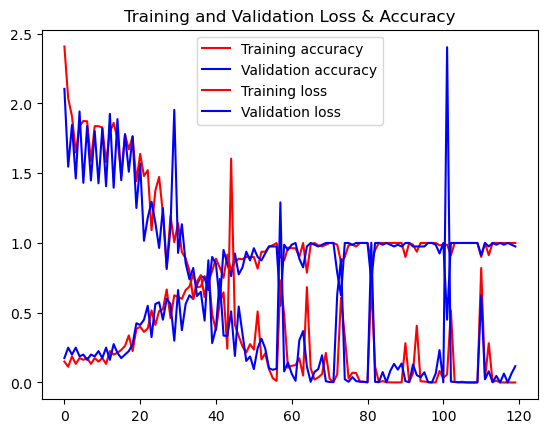

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation Loss & Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()